In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
# Import datetime for Exploratory Climate Analysis 
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# Connect SQLite database with create_engine()
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model with automap_base()
# transfer the contents of the database into a differenct data structure
Base = automap_base()

# Automap Base: creates a base class for an automap schema in SQLAlchemy -
# sets up a foundation to build on in SQLAlchemy
# by adding our code, help the rest of our code to function properly 

# reflect the tables with the prepare() function - reflect the schema of SQLite tables into our code and create mappings
# reflect: create classes that keep code separate - other classes or systems can only interact wuth specific subsets of data
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table - 'Base.classes.<class name>'
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
# 1. Use an SQLAlchemy Session to query our database
session = Session(engine)

# Exploratory Climate Analysis

# 9.2.1 Retrieve the Precipitation Data

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores 
# 1. session.query() - how all queries in SQLAlchemy begin
results = session.query(Measurement.date, Measurement.prcp)

# 2. filter out all of the data that is older than a year from the last record date.
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year )

# 3. Add  a function  (.all) that extracts all of the results from our query and put them in a list.
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year ).all()


# 9.2.2 Save Query Results
### Saving as a DataFrame helps solidify a repeatable process and make it easier to run this analysis again

In [11]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date', 'precipitation'])

In [12]:
# Set the index to the date column with set_index(). Set inplace=True; do not want to create new df.
df.set_index(df['date'], inplace=True)

# IMPORTANT: Print results frquently to ensure correct data query
print(results)

[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

# 9.2.3 Sort the DataFrame

In [13]:
# Sort the dataframe by date
df = df.sort_index()

# Print the dataframe without the index
print(df.to_string(index=False))

      date  precipitation
2016-08-23           0.00
2016-08-23            NaN
2016-08-23           1.79
2016-08-23           0.05
2016-08-23           0.15
2016-08-23           0.70
2016-08-23           0.02
2016-08-24           0.08
2016-08-24           2.15
2016-08-24           2.28
2016-08-24            NaN
2016-08-24           1.45
2016-08-24           1.22
2016-08-24           2.15
2016-08-25           0.08
2016-08-25           0.00
2016-08-25           0.21
2016-08-25           0.06
2016-08-25           0.00
2016-08-25           0.11
2016-08-25           0.08
2016-08-26           0.03
2016-08-26           0.01
2016-08-26           0.00
2016-08-26           0.04
2016-08-26           0.02
2016-08-26           0.00
2016-08-27           0.18
2016-08-27           0.12
2016-08-27           0.00
2016-08-27           0.00
2016-08-27           0.02
2016-08-27            NaN
2016-08-28           0.60
2016-08-28           0.14
2016-08-28           0.01
2016-08-28           0.14
2016-08-28  

# 9.2.4 Plot the Data

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 [Text(-500.0, 0, '2017-05-27'),
  Text(0.0, 0, '2016-08-23'),
  Text(500.0, 0, '2016-11-09'),
  Text(1000.0, 0, '2017-01-28'),
  Text(1500.0, 0, '2017-04-18'),
  Text(2000.0, 0, '2017-07-10'),
  Text(2500.0, 0, '')])

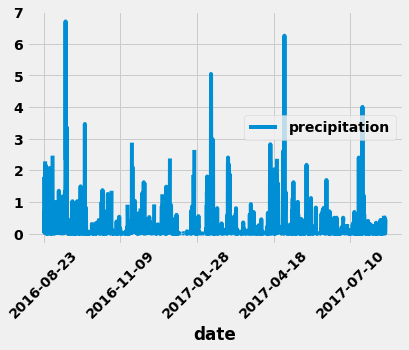

In [14]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()
plt.xticks(rotation=45)


# 9.2.5 Generate the Summary

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# 9.3.1 Find the Number of Stations

In [16]:
# How many stations are available in this dataset?

# 1. Begin by adding the starting point for our query:
session.query()

# 2. Use func.count - counts a given dataset of interest (ref total number of stations) w/ Station.station
session.query(func.count(Station.station))

# 3. Add .all() to end of query so results are returned a sa list.
session.query(func.count(Station.station)).all()

[(9,)]

# 9.3.2 Determine the Most Active Stations

## Determining how active the stations are will tell us how much data has been collected from each station.

### In this case, active essentially means the number of recordings for each station.

In [17]:
# What are the most active stations? - Which stations tend to have the most precipitation recordings?
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc())

# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

# 9.3.3 Find Low, High and Average Temperatures 

In [18]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))

In [19]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

### *Results show that:*
### 1. The low (min) temperature is 54 degrees,
### 2. the high (max) temperature is 85 degrees,
### 3. and the average temperature is approx. 71.7 degrees.

# 9.3.4 Plot the Highest Number of Observations

In [23]:
# Create a Query for the Temperature Observations
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()

# Convert the Temperature Observation Results to a DataFrame
df = pd.DataFrame(results, columns=['tobs'])
print(df.to_string(index=False))

 tobs
 77.0
 77.0
 80.0
 80.0
 75.0
 73.0
 78.0
 77.0
 78.0
 80.0
 80.0
 78.0
 78.0
 78.0
 73.0
 74.0
 80.0
 79.0
 77.0
 80.0
 76.0
 79.0
 75.0
 79.0
 78.0
 79.0
 78.0
 78.0
 76.0
 74.0
 77.0
 78.0
 79.0
 79.0
 77.0
 80.0
 78.0
 78.0
 78.0
 77.0
 79.0
 79.0
 79.0
 79.0
 75.0
 76.0
 73.0
 72.0
 71.0
 77.0
 79.0
 78.0
 79.0
 77.0
 79.0
 77.0
 78.0
 78.0
 78.0
 78.0
 77.0
 74.0
 75.0
 76.0
 73.0
 76.0
 74.0
 77.0
 76.0
 76.0
 74.0
 75.0
 75.0
 75.0
 75.0
 71.0
 63.0
 70.0
 68.0
 67.0
 77.0
 74.0
 77.0
 76.0
 76.0
 75.0
 76.0
 75.0
 73.0
 75.0
 73.0
 75.0
 74.0
 75.0
 74.0
 75.0
 73.0
 75.0
 73.0
 73.0
 74.0
 70.0
 72.0
 70.0
 67.0
 67.0
 69.0
 70.0
 68.0
 69.0
 69.0
 66.0
 65.0
 68.0
 62.0
 75.0
 70.0
 69.0
 76.0
 76.0
 74.0
 73.0
 71.0
 74.0
 74.0
 72.0
 71.0
 72.0
 74.0
 69.0
 67.0
 72.0
 70.0
 64.0
 63.0
 63.0
 62.0
 70.0
 70.0
 62.0
 62.0
 63.0
 65.0
 69.0
 77.0
 70.0
 74.0
 69.0
 72.0
 71.0
 69.0
 71.0
 71.0
 72.0
 72.0
 69.0
 70.0
 66.0
 65.0
 69.0
 68.0
 68.0
 68.0
 59.0
 60.0
 70.

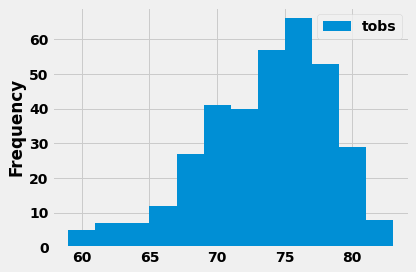

In [24]:
# Plot the Temperature Observations
df.plot.hist(bins=12)
# Compress the x-axis labels so that they fit into the boc
plt.tight_layout()

## Looking at the plot, we can infer that:
###  A vast majority of the observations were over 67 degrees

### If count up bins to right of 67 degrees, will get ~ 325 days where it was over 67 degrees when the temperature was observed
    

<AxesSubplot:ylabel='Frequency'>

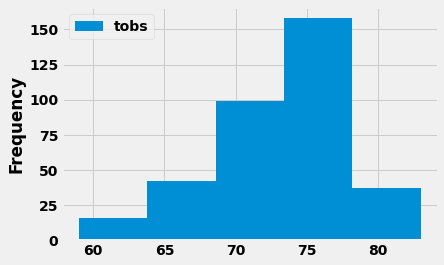

In [25]:
# SKILL DRILL: Adjust # of bins in the plot to 5 then 20 and notice differences.
df.plot.hist(bins=5)

<AxesSubplot:ylabel='Frequency'>

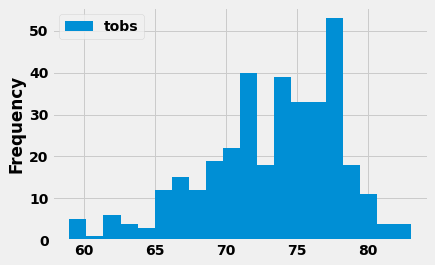

In [26]:
df.plot.hist(bins=20)

# 9.4.1 Incorporate Flask into Data Analysis

In [ ]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge